In [36]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [37]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

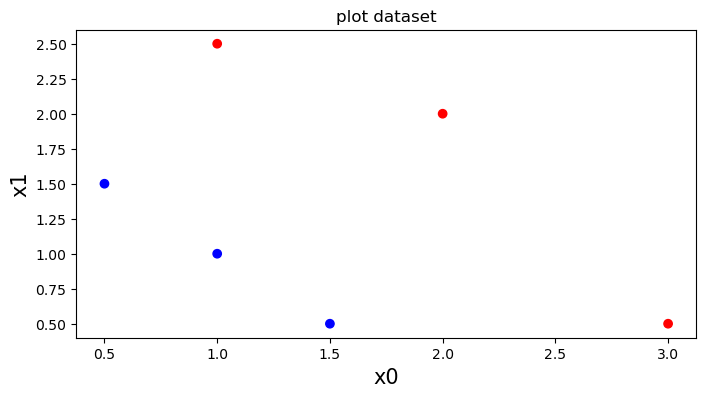

In [38]:
# plot data
fig,ax=plt.subplots(1,1,figsize=(8,4))
ax.scatter(x_train[:,0],x_train[:,1],c=y_train[:,0],cmap='bwr')
ax.set_xlabel('x0',fontsize=15)
ax.set_ylabel('x1',fontsize=15)
ax.set_title('plot dataset')
plt.show()

In [39]:
def sigmoid (z):
    # g= sigmoid(z)
    g=1/(1+np.exp(-z))
    return g

In [40]:
def compute_cost_logistic(x,y,w,b):
    m = x.shape[0]
    cost=0.0
    for i in range(m):
        z_i=np.dot(x[i],w)+b
        f_wb_i=sigmoid(z_i)
        cost  = cost + ( - y[i]*np.log(f_wb_i) - (1-y[i]) * np.log(1-f_wb_i))
        
    cost = cost / m
      
    return cost
        
 

# Logistic Gradient Descent
<img align="right" src="./images/C1_W3_Logistic_gradient_descent.png"     style=" width:400px; padding: 10px; " >

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    

In [41]:
# compute gradient for logistic regression
def gradient(x,y,w,b):
        f_wb = sigmoid(np.dot(x,w)+b)

        dj_dw=0
        dj_db=0
        m=x.shape[0]
        
        for i in range(m):
            dj_dw_i = (f_wb[i]- y[i]) *x[i]
            dj_dw = dj_dw + dj_dw_i
            dj_db_i  = (f_wb[i] - y[i])
            dj_db = dj_db + dj_db_i


        dj_dw = dj_dw / m
        dj_db = dj_db / m
        
        return dj_dw,dj_db
    

    
    

In [42]:
def gradient_desent_multivariable(x,y,w_init,b_init,alpha,num_iterates,compute_cost_logistic):
    
    w = w_init
    b = b_init
    
    
    m = x.shape[0]
    J_cost=[]
    
    for i in range(num_iterates):
        dj_dw,dj_db = gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i<1000:
            J_cost.append(compute_cost_logistic(x,y,w,b))
    
        
        
    return w,b,J_cost
        
    

In [43]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alpha = 0.1
iters = 10000

w,b,J_cost=gradient_desent_multivariable(x_train,y_train,w_tmp,b_tmp,alpha,iters,compute_cost_logistic)
print(w)
print(b)
print(J_cost)

[5.28123029 5.07815608]
[-14.22240998]
[array([0.68461047]), array([0.67778546]), array([0.67224622]), array([0.66767286]), array([0.66382593]), array([0.66052647]), array([0.65764069]), array([0.65506853]), array([0.65273499]), array([0.65058382]), array([0.64857271]), array([0.64666977]), array([0.64485092]), array([0.64309794]), array([0.64139701]), array([0.63973763]), array([0.6381118]), array([0.63651339]), array([0.63493774]), array([0.63338125]), array([0.63184114]), array([0.63031528]), array([0.62880201]), array([0.62730002]), array([0.6258083]), array([0.62432604]), array([0.62285262]), array([0.6213875]), array([0.61993028]), array([0.61848061]), array([0.61703822]), array([0.61560286]), array([0.61417433]), array([0.61275246]), array([0.6113371]), array([0.60992811]), array([0.60852536]), array([0.60712876]), array([0.60573819]), array([0.60435357]), array([0.6029748]), array([0.60160181]), array([0.60023452]), array([0.59887285]), array([0.59751675]), array([0.59616613]),

In [44]:
# plot sigmoid function with z=wx+b

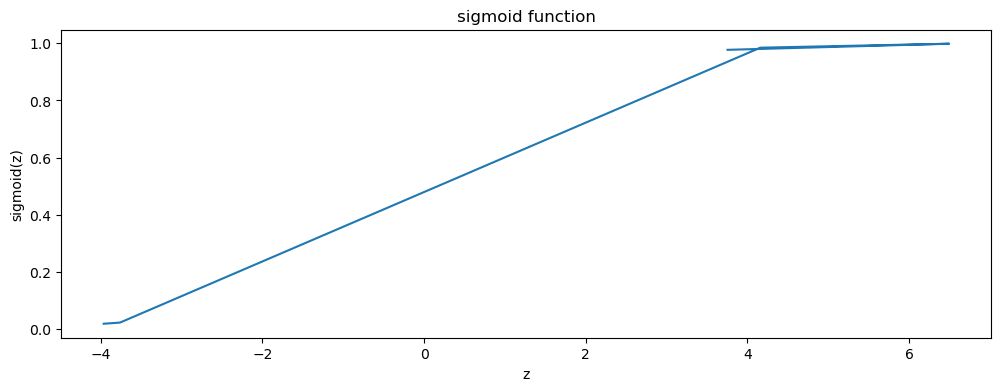

In [45]:
z=np.dot(x_train,w)+b
def sigmoid_function (z):
    # g= sigmoid(z)
    g=1/(1+np.exp(-z))
    return g

fig,ax=plt.subplots(1,1,figsize=(12,4))
ax.plot(z,sigmoid_function(z))

ax.set_title('sigmoid function')
ax.set_xlabel('z')
ax.set_ylabel('sigmoid(z)')
plt.show()

In [48]:
# make prediction
z=np.dot(x_train,w)+b
y_pred=sigmoid(z)
print(y_pred)

[0.01862297 0.02057229 0.02272091 0.98463772 0.99849336 0.97711696]
